In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


## master phe info file (v 20200517) QC

We found that `N_GBE` is too small compared with `N` in this master info file.


In [2]:
versions <- c(20200408, 20200517)


We check the contents of the master phe file against the previous version 20200408.

## read the master phe info file

In [3]:
info_dfs <- list()
for(v in versions){
    info_dfs[[v]] <-
    sprintf('/oak/stanford/groups/mrivas/ukbb24983/phenotypedata/master_phe/master.%s.phe.info.tsv', v) %>%
    fread() %>%
    rename('GBE_ID'='#GBE_ID') %>%
    filter(str_detect(GBE_ID, '^HC')) %>%
    filter(!str_detect(GBE_NAME, '^TTE'))
}


In [5]:
info_dfs[[20200408]] %>%
select(GBE_ID, N, N_GBE, GBE_NAME) %>%
head()

,GBE_ID,N,N_GBE,GBE_NAME
,<chr>,<int>,<int>,<chr>
1,HC0,2116,1406,scoliosis
2,HC1,6569,4509,bowel_/_intestinal_obstruction
3,HC10,388,260,dysmenorrhoea_/_dysmenorrhea
4,HC100,311,215,gastroenteritis/dysentry
5,HC101,787,574,eye_trauma
6,HC102,1489,998,vertigo


In [6]:
info_dfs[[20200517]] %>%
select(GBE_ID, N, N_GBE, GBE_NAME) %>%
head()

,GBE_ID,N,N_GBE,GBE_NAME
,<chr>,<int>,<int>,<chr>
1,HC0,2116,97,scoliosis
2,HC1,6569,309,bowel_/_intestinal_obstruction
3,HC10,388,9,dysmenorrhoea_/_dysmenorrhea
4,HC100,311,7,gastroenteritis/dysentry
5,HC101,787,37,eye_trauma
6,HC102,1489,61,vertigo


## N vs N_GBE plot

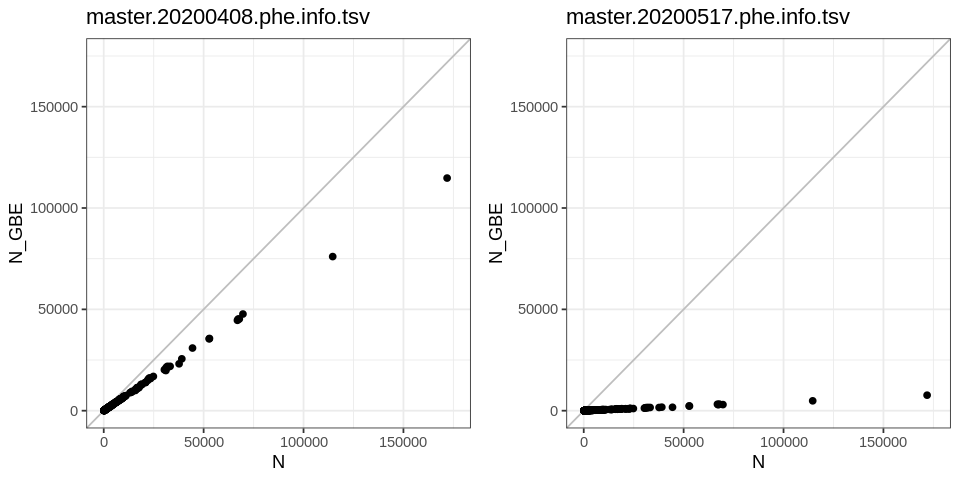

In [17]:
options(repr.plot.width=8, repr.plot.height=4)
gridExtra::grid.arrange(
    info_dfs[[20200408]] %>%
    ggplot(aes(x=N, y=N_GBE)) +
    geom_abline(intercept = 0, slope=1, color='gray') +
    geom_point() + theme_bw() +
    xlim(0, 175000) + ylim(0, 175000) +
    labs(title='master.20200408.phe.info.tsv'), 
    
    info_dfs[[20200517]] %>%
    ggplot(aes(x=N, y=N_GBE)) +
    geom_abline(intercept = 0, slope=1, color='gray') +
    geom_point() + theme_bw() +
    xlim(0, 175000) + ylim(0, 175000) +
    labs(title='master.20200517.phe.info.tsv'),
    
    ncol=2
)


## check the example phenotypes in the original master phe file

In [18]:
phe_dfs <-list()

for(v in versions){
    phe_dfs[[v]] <-
    sprintf('/oak/stanford/groups/mrivas/ukbb24983/phenotypedata/master_phe/master.%s.phe', v) %>%
    fread(select=c('FID', 'IID', 'population', paste0('HC', 0:10)))
}


In [19]:
phe_dfs[[20200408]] %>%
count(population=='white_british', HC0) %>%
filter(HC0==2)

"population == ""white_british""",HC0,n
<lgl>,<int>,<int>
FALSE,2,220
TRUE,2,1406
NA,2,490


In [20]:
phe_dfs[[20200517]] %>%
count(population=='white_british', HC0) %>%
filter(HC0==2)


"population == ""white_british""",HC0,n
<lgl>,<int>,<int>
FALSE,2,220
TRUE,2,1406
NA,2,490
